### This code explores the Form D dataset and focuses on Sales Commission.

In [128]:
import pandas as pd
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 600
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [129]:
os.chdir('J:/Oea/bresler/David/FormD')

# years only starting at 2010 and above based on my Form D downloads.
years = [2010,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
quarters = [1,2,3,4]
df_form = pd.DataFrame()
for years in years:
    for quarter in quarters:
        frame = pd.read_csv('Q' + str(quarter) + '_' + str(years) + '_FORMDSUBMISSION.tsv', sep = '\t')
        df_form = df_form.append(frame, ignore_index=True) 
    

In [130]:
df_form = df_form.drop(['FILE_NUM', 'SCHEMAVERSION', 'TESTORLIVE', 'OVER100PERSONSFLAG', 'OVER100ISSUERFLAG'], axis=1)

In [131]:
# years only starting at 2010 and above based on my Form D downloads.
years = [2010,2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
quarters = [1,2,3,4]
df_issuers = pd.DataFrame()
for years in years:
    for quarter in quarters:
        frame = pd.read_csv('Q' + str(quarter) + '_' + str(years) + '_ISSUERS.tsv', sep = '\t')
        df_issuers = df_issuers.append(frame, ignore_index=True) 

In [132]:
df_issuers = df_issuers.drop([ 'IS_PRIMARYISSUER_FLAG', 'ISSUER_SEQ_KEY', 'STREET1', 'STREET2', 'CITY', 'STATEORCOUNTRYDESCRIPTION', 'ZIPCODE',
                'ISSUER_PREVIOUSNAME_1', 'ISSUER_PREVIOUSNAME_2', 'ISSUER_PREVIOUSNAME_3', 'EDGAR_PREVIOUSNAME_1','EDGAR_PREVIOUSNAME_2',
                'EDGAR_PREVIOUSNAME_3', 'YEAROFINC_TIMESPAN_CHOICE', 'ISSUERPHONENUMBER', 'ENTITYTYPE','ENTITYTYPEOTHERDESC', 'YEAROFINC_VALUE_ENTERED' ], axis=1)

In [133]:
df_FormD = df_form.merge(df_issuers)

In [134]:
# years only starting at 2010 and above based on my Form D downloads.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
quarters = [1,2,3,4]
df_offerings = pd.DataFrame()
for years in years:
    for quarter in quarters:
        frame = pd.read_csv('Q' + str(quarter) + '_' + str(years) + '_OFFERING.tsv', sep = '\t')
        df_offerings = df_offerings.append(frame, ignore_index=True) 


In [135]:
df_offerings = df_offerings.drop (['IS40ACT', 'ISAMENDMENT','PREVIOUSACCESSIONNUMBER','YETTOOCCUR','MORETHANONEYEAR', 'ISBUSINESSCOMBINATIONTRANS',
                    'ISSECURITYTOBEACQUIREDTYPE','ISEQUITYTYPE','ISDEBTTYPE','ISOPTIONTOACQUIRETYPE','ISSECURITYTOBEACQUIREDTYPE',
                   'ISPOOLEDINVESTMENTFUNDTYPE','ISTENANTINCOMMONTYPE','ISMINERALPROPERTYTYPE','ISOTHERTYPE','DESCRIPTIONOFOTHERTYPE',
                   'BUSCOMBCLARIFICATIONOFRESP','MINIMUMINVESTMENTACCEPTED','OVER100RECIPIENTFLAG',
                   'SALESAMTCLARIFICATIONOFRESP','HASNONACCREDITEDINVESTORS','NUMBERNONACCREDITEDINVESTORS',
                   'TOTALNUMBERALREADYINVESTED','SALESCOMM_ISESTIMATE','FINDERSFEE_ISESTIMATE',
                   'FINDERFEECLARIFICATIONOFRESP','GROSSPROCEEDSUSED_DOLLARAMOUNT','GROSSPROCEEDSUSED_ISESTIMATE','GROSSPROCEEDSUSED_CLAROFRESP',
                   'AUTHORIZEDREPRESENTATIVE','INVESTMENTFUNDTYPE', 'SALE_DATE' ],axis =1)

In [136]:
df_FormD = df_FormD.merge(df_offerings)

In [137]:
df_FormD = df_FormD.drop(['ACCESSIONNUMBER'], axis =1)

In [138]:
#I renamed the columns to merge into other pieces of code. This line is not needed.
df_FormD = df_FormD.rename(columns={'FILING_DATE':'Date Filed', 'SIC_CODE':'SIC', 'SUBMISSIONTYPE':'Form Type','STATEORCOUNTRY':'State_bus',
                         'JURISDICTIONOFINC':'state_inc','INDUSTRYGROUPTYPE':'Description'})
                         

In [139]:
df_FormD

,Date Filed,SIC,Form Type,CIK,ENTITYNAME,State_bus,state_inc,Description,REVENUERANGE,AGGREGATENETASSETVALUERANGE,FEDERALEXEMPTIONS_ITEMS_LIST,TOTALOFFERINGAMOUNT,TOTALAMOUNTSOLD,TOTALREMAINING,SALESCOMM_DOLLARAMOUNT,FINDERSFEE_DOLLARAMOUNT
0,2010-03-31 17:28:41,NaN,D,1488062,US PATENT INNOVATIONS LLC,FL,DELAWARE,Other Health Care,Decline to Disclose,NaN,06,1350000,54500,1295500,0,0
1,2010-03-31 17:25:40,NaN,D,1130430,NUGEN TECHNOLOGIES INC,CA,DELAWARE,Other Health Care,Decline to Disclose,NaN,06,1500001,1500001,0,0,0
2,2010-03-31 17:21:05,NaN,D/A,1466971,Copperfield Inn Resorts LLC,NY,DELAWARE,Lodging and Conventions,"$1 - $1,000,000",NaN,06,330000,0,330000,0,0
3,2010-03-31 17:18:54,NaN,D/A,1459002,"ELP Strategic Asset Fund, LLC",NV,NEVADA,Pooled Investment Fund,NaN,"$1 - $5,000,000","06, 3C, 3C.1",Indefinite,1200000,Indefinite,0,0
4,2010-03-31 17:18:46,NaN,D/A,1056733,CHEETAH INVESTMENT PARTNERSHIP LP,PA,PENNSYLVANIA,Pooled Investment Fund,NaN,Decline to Disclose,"06, 3C, 3C.1",Indefinite,18550000,Indefinite,0,0
5,2010-03-31 17:11:31,NaN,D,1487786,Meggitt PLC,X0,UNITED KINGDOM,Manufacturing,Decline to Disclose,NaN,06,Indefinite,2124573,Indefinite,0,0
6,2010-03-31 16:51:10,NaN,D/A,1293419,ACCELA GLOBAL FUND LLC,MD,DELAWARE,Pooled Investment Fund,NaN,Decline to Disclose,06,50000000,8900000,41100000,0,0
7,2010-03-31 16:47:57,7372,D,1057232,INTERPLAY ENTERTAINMENT CORP,CA,DELAWARE,Other Technology,"$1,000,001 - $5,000,000",NaN,06,Indefinite,982650,Indefinite,0,0
8,2010-03-31 16:45:51,NaN,D,1488232,"Angel Oak Structured Income Fund I, LP",GA,DELAWARE,Pooled Investment Fund,NaN,Decline to Disclose,06,Indefinite,300000,Indefinite,0,0
9,2010-03-31 16:45:38,NaN,D,1488140,Hartford Life Insurance Co PPVA Separate Account,CT,CONNECTICUT,Pooled Investment Fund,NaN,Decline to Disclose,"06, 3C.7",Indefinite,50000000,Indefinite,0,0


In [141]:
#export_csv = df_FormD.to_excel (r'J:\Oea\bresler\David\df_formD_test.xlsx', header=True)

In [142]:
entity_counts = df_FormD.groupby(['ENTITYNAME'])['SALESCOMM_DOLLARAMOUNT'].agg(['sum'])

In [143]:
description_counts = df_FormD.groupby(['Description', 'ENTITYNAME'])['SALESCOMM_DOLLARAMOUNT'].agg(['sum'])

In [144]:
description_counts = description_counts[description_counts['sum']>0]

In [145]:
description_counts = description_counts.reset_index()

In [146]:
#export_csv = description_counts.to_excel (r'J:\Oea\bresler\David\description_counts.xlsx', header=True)

In [147]:
# This line removes any record outside 3 standard deviations. 
#entity_counts = entity_counts[(np.abs(stats.zscore(entity_counts)) < 3).all(axis=1)]

In [148]:
entity_counts

,sum
ENTITYNAME,
"#1 A LifeSafer Holdings, Inc.",0
&TV Communications Inc.,0
'Ohana Labs Inc.,0
(OurCrowd Investment in MST) L.P.,0
".Club Domains, LLC",0
"01VC Fund II, L.P.",0
"0210, LLC",0
06068900 B.C. Ltd.,3010700
"07 Offlee Wild/Prize Connection, LLC",0


In [149]:
entity_counts = entity_counts.sort(['sum'], ascending = False)

In [150]:
#export_csv = entity_counts.to_excel (r'J:\Oea\bresler\David\entity_counts.xlsx', header=True)

In [151]:
top10 = entity_counts[:10]

In [152]:
top10

,sum
ENTITYNAME,
"Luxury Properties & Interiors, LLC",100008100000
WRENCHGUY'S MOBILE INC,50000100000
Kingdom of Tunis Republic,22500000000
What if Y not Everthing Inc,9000000000
"What if Y not Everything, Inc.",9000000000
Waterfall Eden Fund Ltd,8151585659
"Scayl, Inc.",6601414000
NATIONWIDE PRIVATE PLACEMENT VARIABLE ACCOUNT,5048035354
"Whitebox Multi-Strategy Fund, LP",1005820613


In [153]:
#export_csv = top10.to_excel (r'J:\Oea\bresler\David\top10.xlsx', header=True)

In [154]:
top10.index

Index(['Luxury Properties & Interiors, LLC', 'WRENCHGUY'S MOBILE INC', 'Kingdom of Tunis Republic', 'What if Y not Everthing Inc', 'What if Y not Everything, Inc.', 'Waterfall Eden Fund Ltd', 'Scayl, Inc.', 'NATIONWIDE PRIVATE PLACEMENT VARIABLE ACCOUNT', 'Whitebox Multi-Strategy Fund, LP', 'FUTURES PORTFOLIO FUND L.P.'], dtype='object')

In [155]:
top10filter_list = top10.index.tolist()

In [156]:
top10filter_list

['Luxury Properties & Interiors, LLC',
 "WRENCHGUY'S MOBILE INC",
 'Kingdom of Tunis Republic',
 'What if Y not Everthing Inc',
 'What if Y not Everything, Inc.',
 'Waterfall Eden Fund Ltd',
 'Scayl, Inc.',
 'NATIONWIDE PRIVATE PLACEMENT VARIABLE ACCOUNT',
 'Whitebox Multi-Strategy Fund, LP',
 'FUTURES PORTFOLIO FUND L.P.']

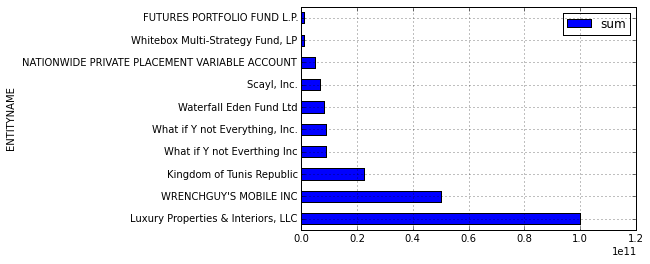

In [157]:
top10.plot(kind = 'barh', )

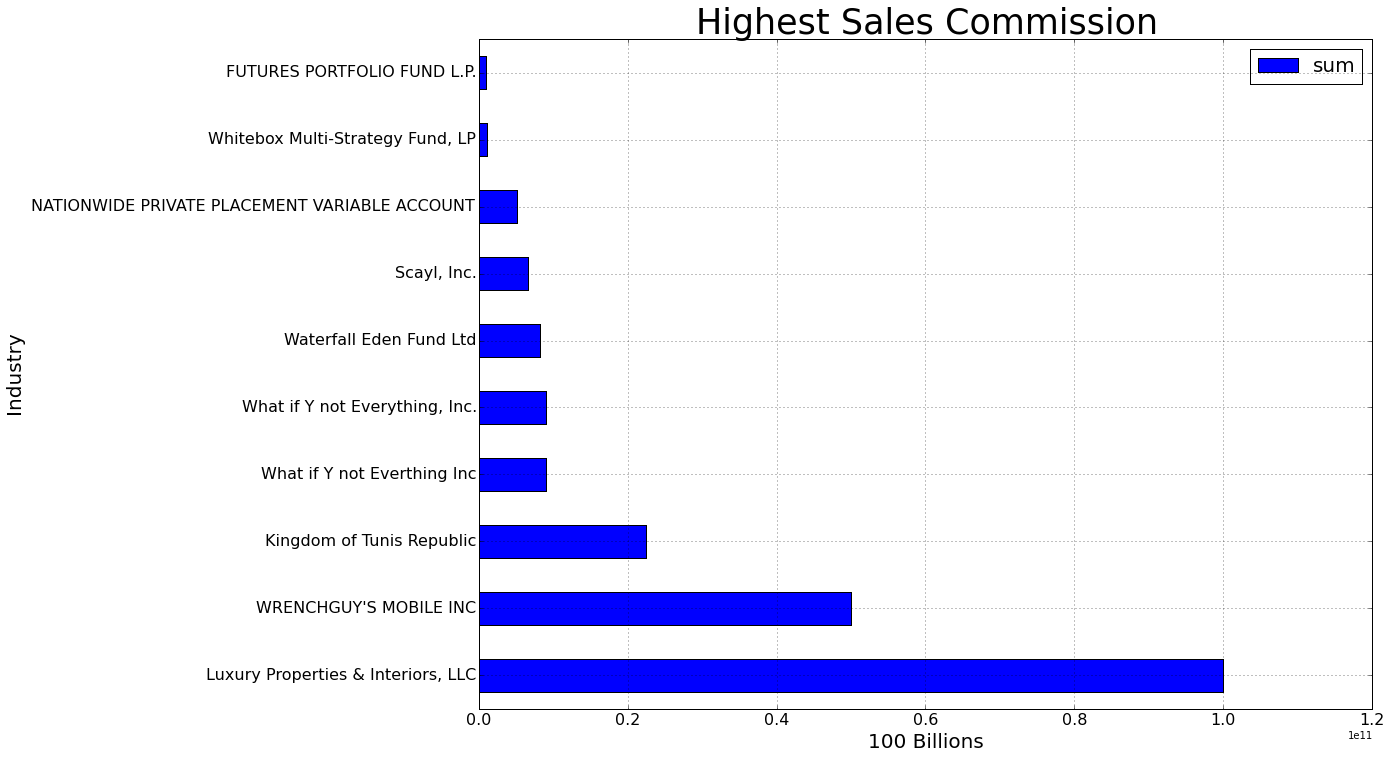

In [178]:
fig, ax = plt.subplots(figsize=(16,12))
top10.plot(kind = 'barh',ax=ax, linewidth=1, fontsize=16)

#plt.tight_layout()
plt.legend(loc=0, prop={'size': 20})
plt.title('Highest Sales Commission', fontsize=35)
plt.xlabel('100 Billions', fontsize=20)
plt.ylabel('Industry', fontsize = 20);

In [158]:
table_fees= pd.pivot_table(df_FormD, values = ['SALESCOMM_DOLLARAMOUNT', 'FINDERSFEE_DOLLARAMOUNT'],
                      index=['Description' ,'ENTITYNAME'],
                     aggfunc= np.sum,
                                        )

In [159]:
table_fees

FINDERSFEE_DOLLARAMOUNT  \
Description                 ENTITYNAME                                                           
Agriculture                 24 Carrots, LLC                                                  0   
                            253 Organic, LLC                                                 0   
                            6064 Deep Branch LLC                                             0   
                            9Fiber, Inc.                                                     0   
                            ABCIDER LLC                                                      0   
                            AGRICULTURAL GAS CO                                              0   
                            AGRICULTURAL SOLUTIONS INC                                       0   
                            AGRISOLVE LLC                                                    0   
                            AGWEST COMMODITIES LLC                                           0   
                            AGWEST ENERGY LLC                                                0   
                            ALOTERRA, LLC                                                    0   
                            ALTERRUS SYSTEMS INC.                                            0   
                            AMERICAN TELSTAR INC                                             0   
                            ANHUI TAIYANG POULTY CO INC                                      0   
                            ARP Family Farms                                             26400   
                            AURORA CANNABIS INC                                              0   
                            Adaptive Symbiotic Technologies, LLC                             0   
                            Advanced Animal Diagnostics Inc                                  0   
                            Advanced BioEnergy, LLC                                          0   
                            Affinity Farms, LLC                                              0   
                            Ag Energy Solutions, Inc.                                    12000   
                            Ag Income Partners, LLC                                          0   
                            Ag Processing Inc a cooperative                                  0   
                            Ag TechInventures, LLC                                           0   
                            AgBiome, LLC                                                     0   
                            AgSmarts, Inc.                                                   0   
                            AgTec Innovations, Inc.                                          0   
                            Agbotic Inc                                                      0   
                            Agilis Partners                                                  0   
                            AgriHorizon, Inc.                                                0   
...                                                                                        ...   
Tourism and Travel Services THEGR8GROUP, LLC                                                 0   
                            TRIMAX CORP                                                      0   
                            Team Vision Virtual, Inc.                                        0   
                            Techotel, Inc.                                                   0   
                            Tivona & Haug, Inc.                                              0   
                            TraVertex Inc                                                50000   
                            Trafla, Inc.                                                     0   
                            Travel Equity Partners, LLC                                      0   
                            TravelPerk, Inc.         

In [160]:
top10fees = pd.DataFrame()

In [161]:
os.chdir('J:/Oea/bresler/David/')
top10fees = pd.read_csv('top10fees.csv')

In [162]:
top10fees = top10fees.set_index('Type')

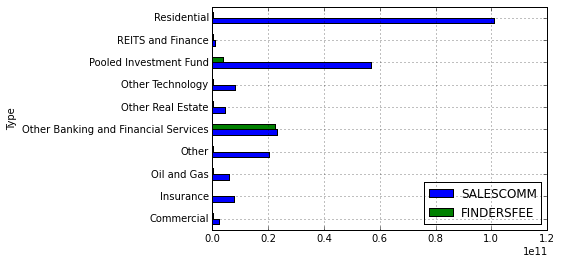

In [165]:
top10fees.plot(kind = 'barh', )

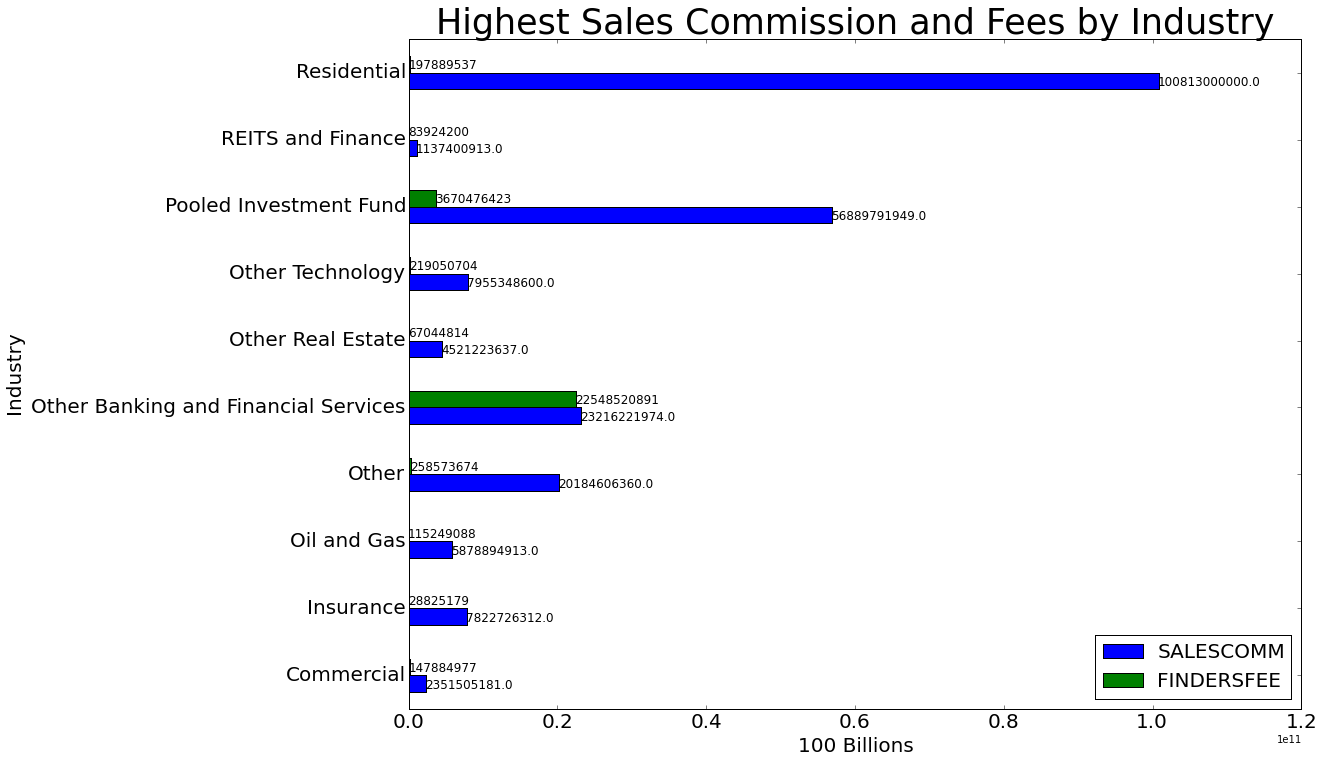

In [173]:
fig, ax = plt.subplots(figsize=(16,12))
top10fees.plot(kind = 'barh',ax=ax, linewidth=1, fontsize=20)

#plt.tight_layout()
plt.legend(loc=0, prop={'size': 20})
plt.title('Highest Sales Commission and Fees by Industry', fontsize=35)
plt.xlabel('100 Billions', fontsize=20)
plt.ylabel('Industry', fontsize = 20);

ax.grid(False) #remove grid
#ax.set_xticks([]) #set empty xticks

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+250, i.get_y()+0.05, \
            str((i.get_width())), fontsize=12,
color='black')
plt.show();